In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_roots(x, a=1.01,b=-3.07 ,c=2.07):
    return a*x**2 + b*x + c
def f_roots2(x, a=1.,b=-2. ,c=1.):
    return a*x + b

In [3]:
def check_values(f, x_min, x_max, tol):
    if (x_min > x_max):
        dummy = x_min
        x_min = x_max
        x_max = dummy
    
    y_min = f(x_min)
    y_max = f(x_max)
    
    if (y_min * y_max >= 0.0):
        print("Error: no single zero crossing. Please bracket a single crossing.")
        s = "f(%f) = %f, f(%f) = %f" % (x_min,y_min, x_max, y_max)
        print(s)
        return 0
    
    #if x_min is a root, return 1
    if (np.fabs(y_min < tol)):
        return 1
    
    #same for x_max
    if (np.fabs(y_max) < tol):
        return 2
    
    #bracket is valid if the checker reaches 3
    return 3

In [14]:
def root_finder_bis(f, tol=1.0e-8, imax=1000):
    x = np.linspace(-10,10,1000)
    y = f(x)
    plt.plot(x,y)
    plt.xlim(0,3)
    plt.ylim(-.5,2.1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    plt.plot(x,y)
    plt.xlim(0,3)
    plt.ylim(-.5,2.1)
    plt.xlabel('x')
    plt.ylabel('y')
    
    xmin = float(input('Please enter a bound for the function and press enter: '))
    plt.plot(xmin,f(xmin),marker='>')
    xmax = float(input('Repeat for the second bound: '))
    plt.plot(xmax,f(xmax),marker='<')
    
    
    
    ch = input("Would you like to add a tolerance? Y/N :  ")
    if(ch == 'Y'):
        tol = float(input("Please insert tolerance value in decimal (0.000001) or scientific notation (eg. 1.0e-6): "))
    
    if (xmin > xmax):
        dum = xmin
        xmin = xmax
        xmax = dum
    
    i = 0           #initialize counter
    xmin_st = xmin  #saves initial xmin value
    xmax_st = xmax  #saves initial xmax value
    xmid = 0.0
    ymid = 0.0      #defines vars outside of while, allows loop to just replace var
    
    ##verifies values work for function##
    
    flag = check_values(f, xmin, xmax, tol)
    if(flag==0):
        print('Error in root_finder_bis().')
        raise ValueError('Initial values invalid', xmin_st, xmax_st)
    elif(flag==1):
        print('Lower bound within tolerance value of y=0')
        return xmin
    elif(flag==2):
        print('Upper bound within tolerance value of y=0')
        return xmax
    
    ####function start####
    
    flag = 1
    while(flag):
        
        xmid = 0.5*(xmin + xmax)
        ymid = f(xmid)
        
        if(np.abs(ymid)<tol):
            flag=0
        elif(f(xmid)*f(xmax)>0):
            xmax = xmid
        elif(f(xmid)*f(xmin)>0):
            xmin = xmid
        i+=1
        
        if(i >= imax):
            print('Error: reached maximum iterations of ', i)
            s = "Min bracket    f(%f) = %f" % (xmin, f(xmin))
            l = "Max bracket    f(%f) = %f" % (xmax, f(xmax))
            r = "Final midpoint f(%f) = %f" % (xmid, ymid)
            print(s, l, r)
            raise StopIteration('Stopping iterations after ', i)
    plt.plot(xmid,ymid,marker='o')
    plt.show()
    
    print ('\nWith x-boundaries: ', xmin_st,",", xmax_st, '\nand y-values: y1 =', f(xmin_st), ', y2 =', f(xmax_st),'\n')
    print ('A rational root determined in this range to be: ', xmid, '\nwith y in tolerance range at: ', ymid)
    print ('Iterations: ', i)

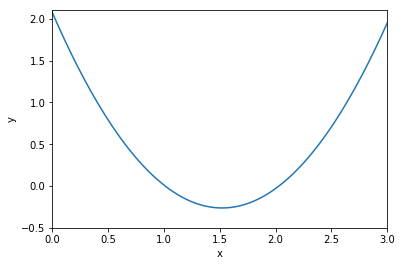

Please enter a bound for the function and press enter: 0
Repeat for the second bound: 1.5
Would you like to add a tolerance? Y/N :  n


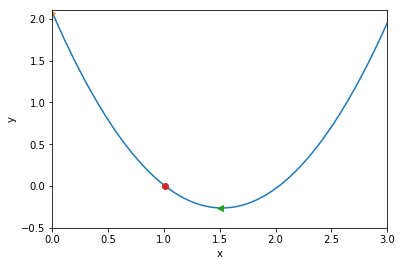


With x-boundaries:  0.0 , 1.5 
and y-values: y1 = 2.07 , y2 = -0.26249999999999973 

A rational root determined in this range to be:  1.009612686932087 
with y in tolerance range at:  6.508863670262599e-09
Iterations:  26


In [15]:
root_finder_bis(f_roots)